In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement:
Analyze the heart disease dataset to explore the machine learning algorithms and build
decision tree model to predict the disease.

# Variable Description:

Column Description
age: Age of the patient
gender: Gender of the patient - (0,1) - (Male, Female)
chest_pain: It refers to the chest pain experienced by the patient -(0,1,2,3)
rest_bps: Blood pressure of the patient while resting(in mm/Hg)
cholesterol: Patient's cholesterol level (in mg/dl)
fasting_blood_sugar: The blood sugar of the patient while fasting
rest_ecg: Potassium level (0,1,2)
thalach: The patient’s maximum heart rate
exer_angina: It refers to exercise-induced angina - (1=Yes, 0=No)
old_peak: It is the ST depression induced by exercise relative to rest(ST
relates to the position on ECG plots)
slope: It refers to the slope of the peak of the exercise ST-Segment-
(0,1,2)
ca Number of major vessels: (0,1,2,3,4)
thalassemia: It refers to thalassemia which is a blood disorder - (0,1,2,3)
target: The patient has heart disease or not - (1=Yes, 0=No)


In [123]:
df=pd.read_csv(r"C:\Users\Chhaya\OneDrive\Desktop\PythonAssignments\DecTree\2 Project\Heart Disease Prediction\Dataset\Dataset\HeartDisease.csv")

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [125]:
df[["gender","chest_pain","rest_ecg","exer_angina","slope","ca","thalassemia","fasting_blood_sugar"]]=df[["gender","chest_pain","rest_ecg","exer_angina","slope","ca","thalassemia","fasting_blood_sugar"]].astype("object")
                                                                                       

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    object 
 2   chest_pain           303 non-null    object 
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    object 
 6   rest_ecg             303 non-null    object 
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    object 
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    object 
 11  ca                   303 non-null    object 
 12  thalassemia          303 non-null    object 
 13  target               303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [127]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [128]:
df.describe(include="object")

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


In [129]:
df.describe()

,age,rest_bps,cholestrol,thalach,old_peak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [130]:
df["gender"].value_counts()

1    207
0     96
Name: gender, dtype: int64

# EDA
Univariate Analysis

<Figure size 1296x1296 with 0 Axes>

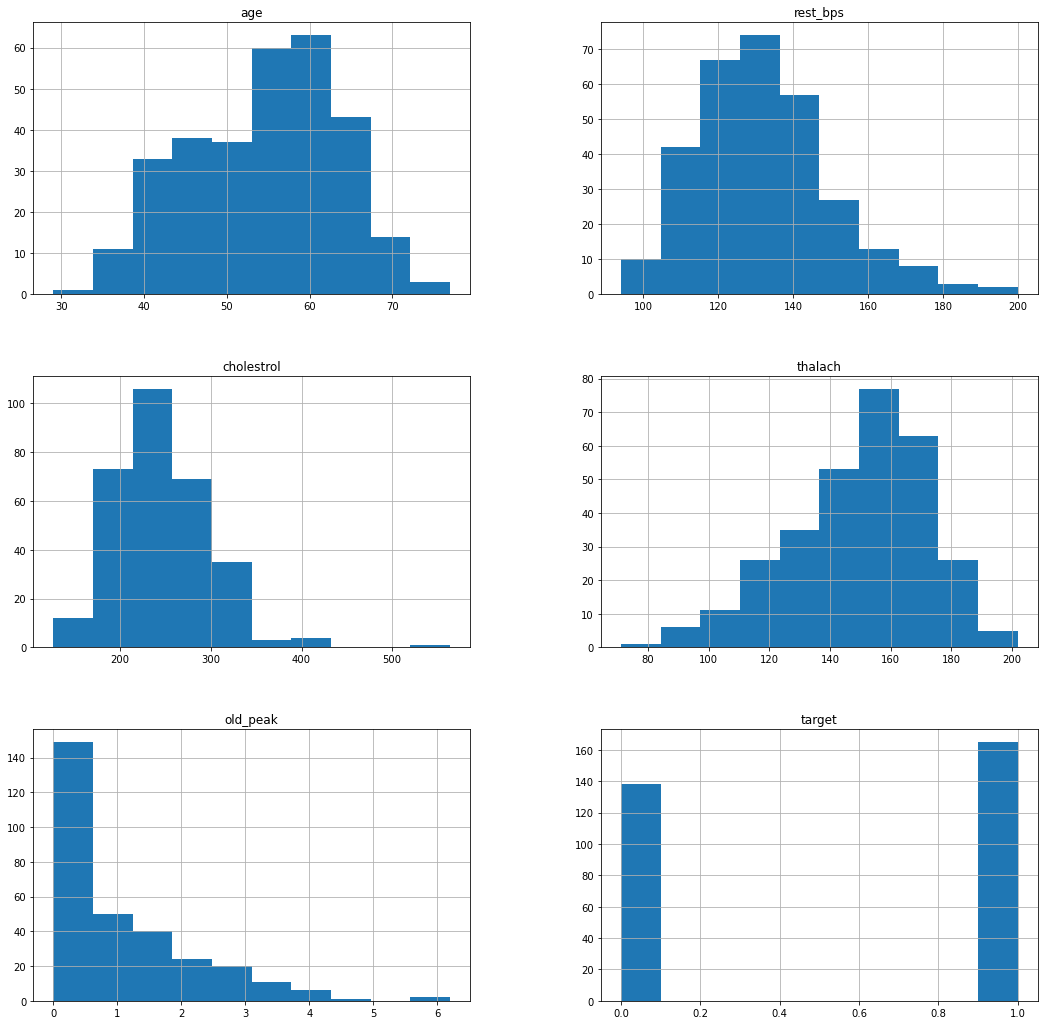

In [131]:
plt.figure(figsize=(18,18))
df.hist(figsize=(18,18));

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

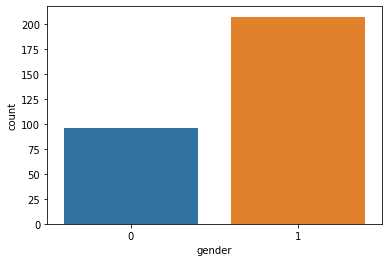

In [139]:
sns.countplot(df["gender"])

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest_pain', ylabel='count'>

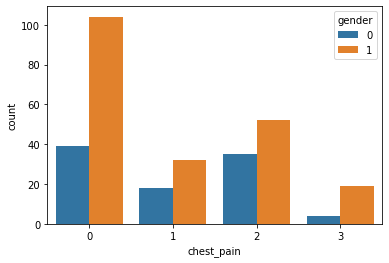

In [141]:
sns.countplot(df["chest_pain"],hue=df["gender"])

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

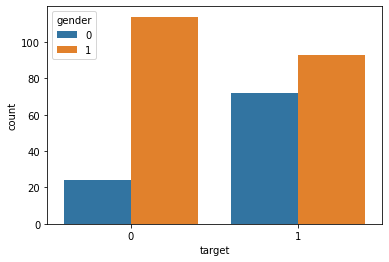

In [142]:
sns.countplot(df["target"],hue=df["gender"])

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

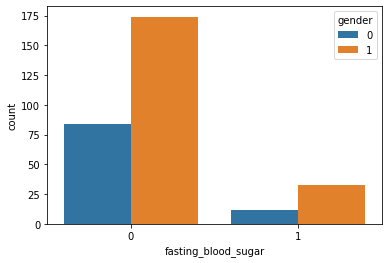

In [143]:
sns.countplot(df["fasting_blood_sugar"],hue=df["gender"])

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exer_angina', ylabel='count'>

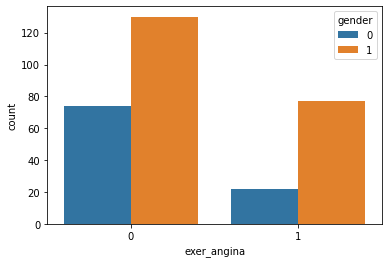

In [144]:
sns.countplot(df["exer_angina"],hue=df["gender"])

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalassemia', ylabel='count'>

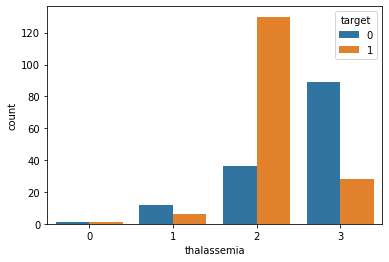

In [153]:
sns.countplot(df["thalassemia"],hue=df["target"])

Bivariate Analysis

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


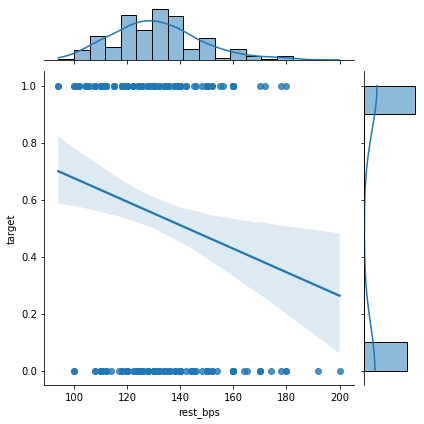

In [132]:
sns.jointplot(df["rest_bps"],df["target"],kind="reg")

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


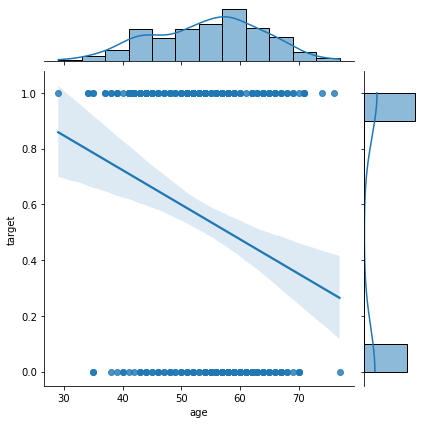

In [133]:
sns.jointplot(df["age"],df["target"],kind="reg")

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='thalach'>

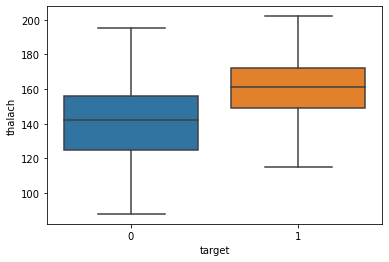

In [156]:
sns.boxplot(df["target"],df["thalach"],showfliers=False)

Text(0, 0.5, 'Probability Density')

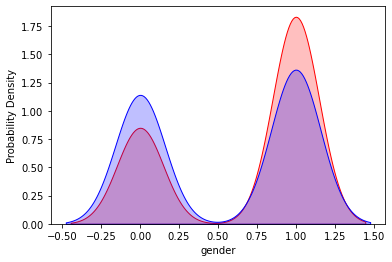

In [135]:
sns.kdeplot(df["gender"], color='r', shade=True)
  
sns.kdeplot(df["target"], color='b', shade=True)
  
plt.xlabel('gender')
plt.ylabel('Probability Density')

In [136]:
df_=pd.crosstab(df["gender"],df["target"],values=df["chest_pain"],aggfunc="mean")

In [137]:
df_

target,0,1
gender,,
0,0.166667,1.333333
1,0.543860,1.408602


C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


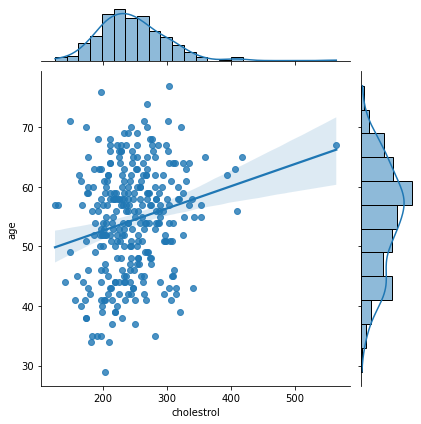

In [152]:
sns.jointplot(df["cholestrol"],df["age"],kind="reg")

C:\Users\Chhaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest_pain', ylabel='cholestrol'>

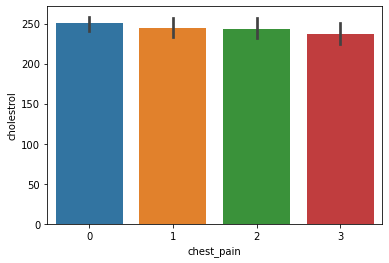

In [155]:
sns.barplot(df["chest_pain"],df["cholestrol"])

# Inferences

from EDA we can conclude that:
1.Data is little biased on gender as count of male is less than female,so chances of heart disease in females is higher.
2.Age and chances of having heart disease has inverse relation so it cannot be claimed that elderly people have high chances of heart failure.
3.As elderly people have high cholestrol.
4.High cholestrol has direct relation with chest pain.
5.Thalassemia strongly relates with occurence of heart disease. 

In [158]:
data=df.corr()
data

,age,rest_bps,cholestrol,thalach,old_peak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


<AxesSubplot:>

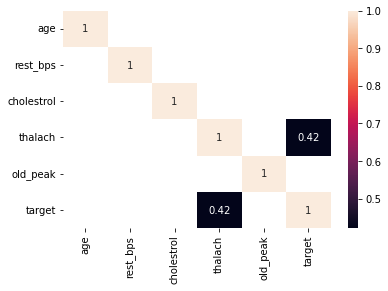

In [161]:
sns.heatmap(data[data>0.3],annot=True)

Feature Engineering

In [162]:
df1=pd.get_dummies(df,drop_first=True)
df1[:10]

C:\Users\Chhaya\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,...,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
7,44,120,263,173,0.0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,52,172,199,162,0.5,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,57,150,168,174,1.6,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


Model Building

In [164]:
x=df1.drop("target",axis=1)
y=df1["target"]

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=103)

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
dct=DecisionTreeClassifier(random_state=104,max_depth=50).fit(x_train,y_train)

In [169]:
y_pred=dct.predict(x_test)

In [170]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
ac=accuracy_score(y_pred,y_test)

In [173]:
ac

0.7802197802197802

In [177]:
dict1={"criterion":["gini","entropy"],
      "splitter":["best","random"],
      "max_depth":range(50)}

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
model=GridSearchCV(dct,param_grid=dict1,cv=10,n_jobs=-1)

In [180]:
model.fit(x_train,y_train)

C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be great

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=50, random_state=104),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 50),
                         'splitter': ['best', 'random']})

In [181]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}

In [182]:
model2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, splitter= 'random',random_state=105)

In [183]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=105,
                       splitter='random')

In [185]:
y_pred_=model2.predict(x_test)

In [186]:
y_pred_

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [187]:
ac1=accuracy_score(y_pred_,y_test)

In [188]:
ac1

0.7582417582417582

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
model_=RandomForestClassifier(random_state=104)

In [191]:
model_.fit(x_train,y_train)

RandomForestClassifier(random_state=104)

In [192]:
y_pred1=model.predict(x_test)

In [193]:
y_pred1

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [194]:
ac2=accuracy_score(y_test,y_pred1)

In [195]:
dict2={"n_estimators":range(50),"criterion":["gini","entropy"],
      "max_depth":range(10)}

In [196]:
model1=GridSearchCV(model_,param_grid=dict2,cv=10,n_jobs=-1)

In [197]:
model1.fit(x_train,y_train)

C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1180 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\Chhaya\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be grea

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=104),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'n_estimators': range(0, 50)})

In [198]:
y_pred2=model1.predict(x_test)

In [199]:
ac3=accuracy_score(y_test,y_pred2)

In [200]:
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
model3=GradientBoostingClassifier(random_state=103)

In [202]:
model3.fit(x_train,y_train)

GradientBoostingClassifier(random_state=103)

In [203]:
y_pred3=model3.predict(x_test)

In [204]:
ac4=accuracy_score(y_test,y_pred3)

In [205]:
import xgboost as xgb

In [206]:
model4=xgb.XGBClassifier(random_state=103)

In [207]:
model4.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=103,
              reg_alpha=0, reg_lambda=1, ...)

In [208]:
y_pred4=model4.predict(x_test)

In [209]:
ac5=accuracy_score(y_test,y_pred4)

In [210]:
comp=pd.DataFrame([{"Model":"DecisionTree",
                   "Accuracy":ac1},
                  {"Model":"RandomForest",
                  "Accuracy":ac2},
                  {"Model":"GridSearch",
                    "Accuracy":ac3},
                   {"Model":"GradientBoosting",
                  "Accuracy":ac4},
                  {"Model":"XGBooster",
            "Accuracy":ac5}],index=[1,2,3,4,5])

In [211]:
comp

,Model,Accuracy
1,DecisionTree,0.758242
2,RandomForest,0.681319
3,GridSearch,0.802198
4,GradientBoosting,0.813187
5,XGBooster,0.802198


# Conclusion

We can compare accuracy of different models from "comp" table and it shows that accuracy is best in Gardient Boosting Classifier.